In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# simulasi employee data
employee_data = {
    "EmpID": range(1001, 4001),
    "BusinessUnit": (
        ["WBL"] * 300 +
        ["PZ"] * 300 +
        ["CCDR"] * 300 +
        ["SVG"] * 300 +
        ["NEL"] * 300 +
        ["PL"] * 300 +
        ["EW"] * 300 +
        ["BPC"] * 300 +
        ["TNS"] * 300 +
        ["MSC"] * 300
    )
}

df_employee = pd.DataFrame(employee_data)


In [3]:
# simulasi training data
training_data = {
    "EmpID": df_employee["EmpID"],
    "TrainingName": ["Safety Training"] * len(df_employee),
    "Mandatory": ["Yes"] * len(df_employee),
    "CompletionStatus": (
        ["Completed"] * 1800 +
        ["Not Completed"] * 1200
    )
}

df_training = pd.DataFrame(training_data)


In [4]:
# merge data
df_merged = pd.merge(df_employee, df_training, on="EmpID")


In [5]:
# filter training
df_mandatory = df_merged[df_merged["Mandatory"] == "Yes"]


In [6]:
# hitung status completion per business unit
summary = (
    df_mandatory
    .groupby(["BusinessUnit", "CompletionStatus"])
    .size()
    .unstack(fill_value=0)
)

summary["Total"] = summary.sum(axis=1)
summary["CompletionRate (%)"] = (
    summary["Completed"] / summary["Total"] * 100
).round(2)

summary


CompletionStatus,Completed,Not Completed,Total,CompletionRate (%)
BusinessUnit,,,,
BPC,0,300,300,0.0
CCDR,300,0,300,100.0
EW,0,300,300,0.0
MSC,0,300,300,0.0
NEL,300,0,300,100.0
PL,300,0,300,100.0
PZ,300,0,300,100.0
SVG,300,0,300,100.0
TNS,0,300,300,0.0


In [7]:
summary.to_csv("training_compliance_summary.csv")

from google.colab import files
files.download("training_compliance_summary.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

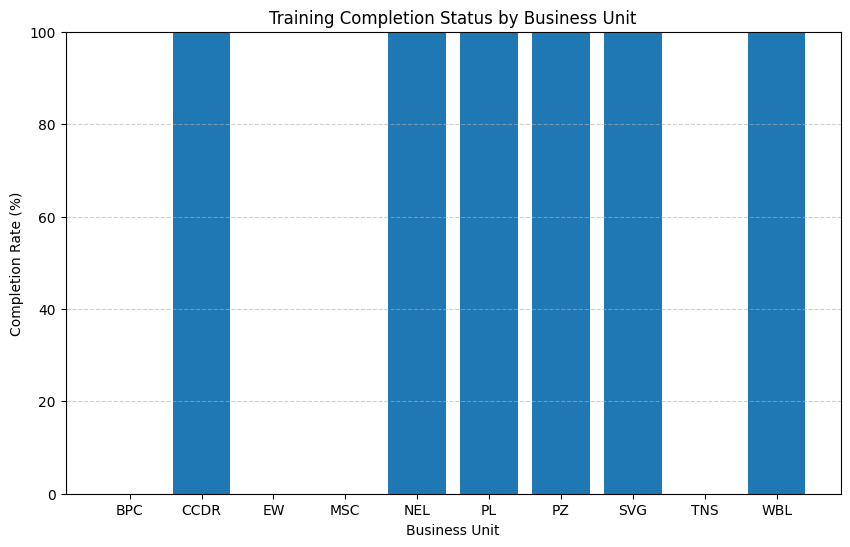

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(summary.index, summary["CompletionRate (%)"])
plt.xlabel("Business Unit")
plt.ylabel("Completion Rate (%)")
plt.title("Training Completion Status by Business Unit")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
